#  ***ZOMATO RESTAURANT RECOMMANDATION SYSTEM***








# Mount the dataset into colab notebook.

In [ ]:
 # Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Upload the image

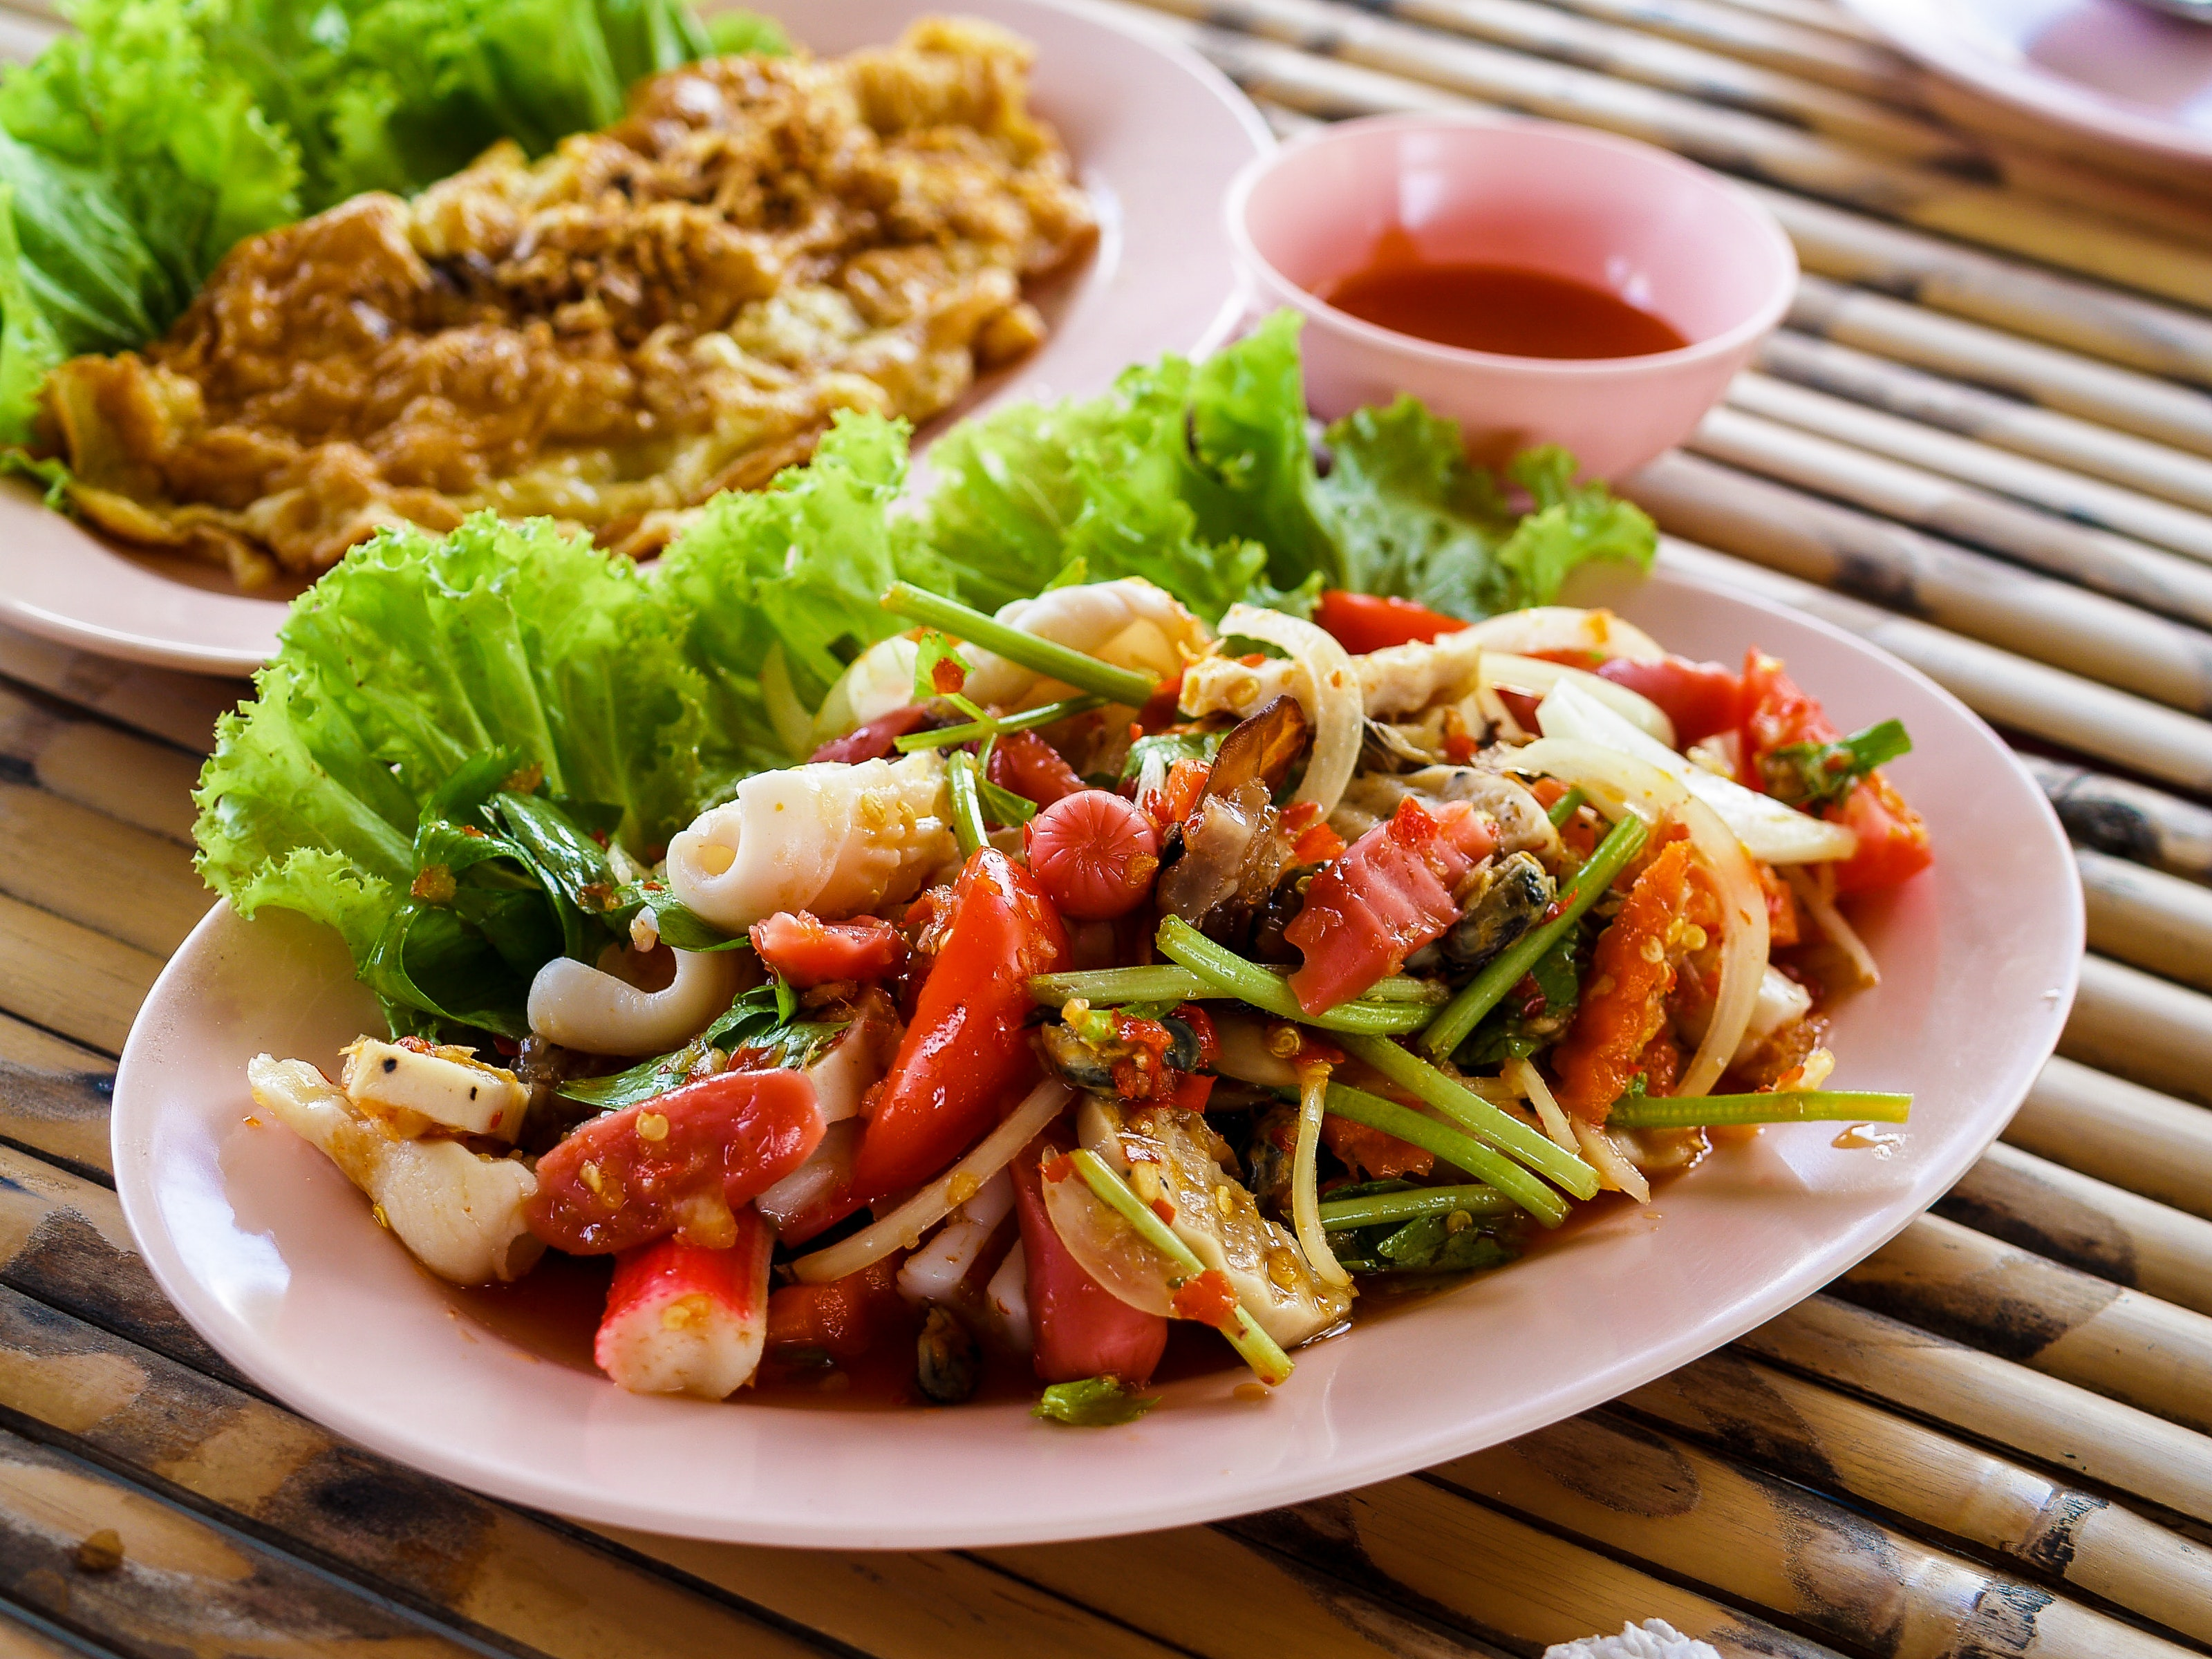

In [ ]:
from IPython import display
display.Image("/content/drive/MyDrive/dataset/img1.jpg",width=800)


# Importing libraries.

In [ ]:
#Importing Libraries
import numpy as np #NumPy is a general-purpose array-processing package.
import pandas as pd #It contains high-level data structures and manipulation tools designed to make data analysis fast and easy.
import matplotlib.pyplot as plt #It is a Plotting Library
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
import seaborn as sb  
from sklearn.metrics import r2_score

#Loading and reading a dataset.

In [ ]:
zomato_data=pd.read_csv("/content/drive/MyDrive/dataset/zomato.csv")
zomato_data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Data cleaning 
* Deleting redundant columns.
* Renaming the columns.
* Dropping duplicates.
* Cleaning individual columns.
* Remove the NaN values from the dataset
* Some Transformations



Looking at the information about dataset,datatypes of the corresponding columns and missing values.

In [ ]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

#Checking NULL values.

In [ ]:
zomato_data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Deleting unnecessary columns. 
 Droping the columns "url" , "dish_like" , "phone"and saving the dataset as 'zomato".

In [ ]:
zomato=zomato_data.drop(['url','phone','address','location','rest_type', 'menu_item', 'votes'],axis=1)

#Removing the duplicates.

In [ ]:
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

#Remove the NaN values from the dataset.

In [ ]:
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23462 entries, 0 to 51715
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         23462 non-null  object
 1   online_order                 23462 non-null  object
 2   book_table                   23462 non-null  object
 3   rate                         23462 non-null  object
 4   dish_liked                   23462 non-null  object
 5   cuisines                     23462 non-null  object
 6   approx_cost(for two people)  23462 non-null  object
 7   reviews_list                 23462 non-null  object
 8   listed_in(type)              23462 non-null  object
 9   listed_in(city)              23462 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


# Reading column names

In [ ]:
#Reading column names
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

#Changing the Columns Names.

In [ ]:
#Changing the Columns Names
zomato.columns
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'dish_liked', 'cuisines',
       'cost', 'reviews_list', 'type', 'city'],
      dtype='object')

# Get dummies the column

In [ ]:
#df_dummies = pd.get_dummies(zomato,columns=['online_order','book_table','cuisines','type'])
#df_dummies.head()

#Some Transformations.

In [ ]:
#Changaing the cost to string.
zomato['cost'] = zomato['cost'].astype(str)

#Using lambda function to replace ',' from cost.
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))

# Changing the cost to folat.
zomato['cost'] = zomato['cost'].astype(float)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23462 entries, 0 to 51715
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23462 non-null  object 
 1   online_order  23462 non-null  object 
 2   book_table    23462 non-null  object 
 3   rate          23462 non-null  object 
 4   dish_liked    23462 non-null  object 
 5   cuisines      23462 non-null  object 
 6   cost          23462 non-null  float64
 7   reviews_list  23462 non-null  object 
 8   type          23462 non-null  object 
 9   city          23462 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.0+ MB


#Reading rate dataset.

In [ ]:
#Reading rate dataset.
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '2.8 /5', '3.2 /5', '3.0 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#Removing '/5' from Rates.

In [ ]:
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [ ]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23315 entries, 0 to 23314
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23315 non-null  object 
 1   online_order  23315 non-null  object 
 2   book_table    23315 non-null  object 
 3   rate          23315 non-null  float64
 4   dish_liked    23315 non-null  object 
 5   cuisines      23315 non-null  object 
 6   cost          23315 non-null  float64
 7   reviews_list  23315 non-null  object 
 8   type          23315 non-null  object 
 9   city          23315 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.8+ MB


# Adjust the column names.

In [ ]:
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 750.  , 200.  , 850.  ,   1.2 , 150.  , 350.  , 250.  ,
         1.5 ,   1.3 ,   1.  , 100.  , 900.  ,   1.1 ,   1.6 , 950.  ,
       230.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,   1.8 ,   1.9 ,
       180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,   3.4 ,  40.  ,
         1.25,   3.5 ,   4.  ,   2.4 ,   1.45,   3.2 ,   6.  ,   1.05,
         4.1 ,   2.3 , 120.  ,   2.6 ,   5.  ,   3.7 ,   1.65,   2.7 ,
         4.5 ])

#Get Correlation between different variables.

Index(['name', 'online_order', 'book_table', 'rate', 'dish_liked', 'cuisines',
       'cost', 'reviews_list', 'type', 'city'],
      dtype='object')

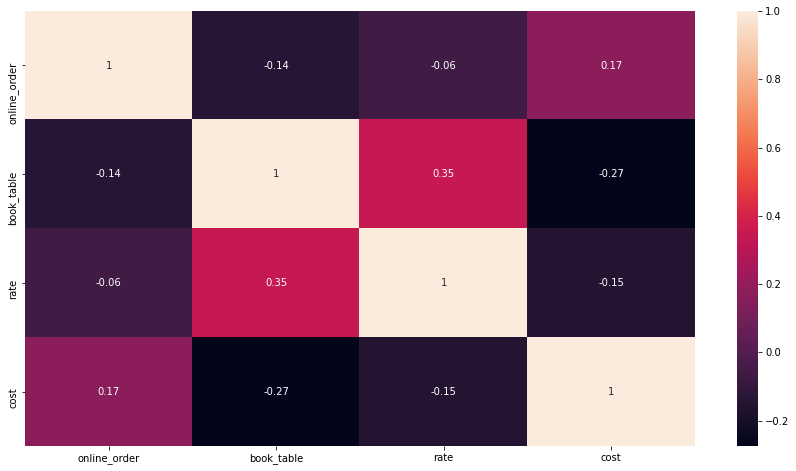

In [ ]:
corr = zomato.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato.columns

The highest correlation is between name and address which is 0.35 which is not of very much concern


In [ ]:
zomato.head()

,name,online_order,book_table,rate,dish_liked,cuisines,cost,reviews_list,type,city
0,Jalsa,True,True,4.1,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,True,False,4.1,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,True,False,3.8,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,False,False,3.7,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,False,False,3.8,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [ ]:
# Checking Null values
zomato.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
type            0
city            0
dtype: int64

## Computing Mean Rating

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
restaurants = list(zomato['name'].unique())
zomato['Mean Rating'] = 0

for i in range(len(restaurants)):
    zomato['Mean Rating'][zomato['name'] == restaurants[i]] = zomato['rate'][zomato['name'] == restaurants[i]].mean()
zomato['Mean Rating']

0        4.118182
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
23310    3.800000
23311    3.900000
23312    3.050000
23313    2.275000
23314    4.300000
Name: Mean Rating, Length: 23315, dtype: float64

In [ ]:
zomato.head()

,name,online_order,book_table,rate,dish_liked,cuisines,cost,reviews_list,type,city,Mean Rating
0,Jalsa,True,True,4.1,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.118182
1,Spice Elephant,True,False,4.1,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.100000
2,San Churro Cafe,True,False,3.8,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.800000
3,Addhuri Udupi Bhojana,False,False,3.7,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.700000
4,Grand Village,False,False,3.8,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.800000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
zomato[['Mean Rating']] = scaler.fit_transform(zomato[['Mean Rating']]).round(1)#minmaxscalar=x-min(x)/max(x)-min(x)
zomato.sample(3)


,name,online_order,book_table,rate,dish_liked,cuisines,cost,reviews_list,type,city,Mean Rating
2368,The Tao Terraces,True,True,4.0,"Salads, Cocktails, Khao Suey, Jumbo Prawns, Ve...","Thai, Japanese, Korean, Burmese, Chinese",2.1,"[('Rated 5.0', ""RATED\n Wonderful place and d...",Delivery,Brigade Road,3.8
2606,The Bangalore Cafe,False,True,4.1,"Pasta, Coffee, Chaat, Paneer Pizza, Tawa Pulav...","Modern Indian, North Indian, Pizza, Continenta...",800.0,"[('Rated 5.0', ""RATED\n Probably the best poc...",Dine-out,Brigade Road,4.1
7278,Bangalore Cafe,True,False,3.7,"Sabudana Vada, Masala Dosa, Filter Coffee, Pes...","South Indian, Fast Food",400.0,"[('Rated 3.0', 'RATED\n It\'s just beside the...",Delivery,HSR,3.5


# Text Preprocessing

#Some of the common text preprocessing / cleaning steps are:
* Lower casing
* Removal of Punctuations
* Removal of Stopwords
* Removal of URLs
* Spelling correction

In [ ]:
# 5 examples of these columns before text processing:
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
22503,"[('Rated 4.0', 'RATED\n We just went out to t...","Cafe, Italian, Pizza"
18862,"[('Rated 3.0', 'RATED\n Food is very nice it ...","Fast Food, Burger, Beverages, Cafe, Desserts"
22603,"[('Rated 5.0', 'RATED\n This is my go to orde...","South Indian, North Indian, Chinese"
8345,"[('Rated 4.5', 'RATED\n The most calm and pea...","Salad, Cafe, Continental, Steak, Italian, Burg..."
23177,"[('Rated 1.0', 'RATED\n Horrible food. Check ...",North Indian


# Lower Casing

In [ ]:
# Lower Casing
zomato["reviews_list"] = zomato["reviews_list"].str.lower()
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
4444,"[('rated 2.0', 'rated\n chole bhature were ex...","Mithai, Street Food, Fast Food"
6015,"[('rated 5.0', ""rated\n hands down.. this is ...","Continental, Mexican, Burger, Desserts, Italia..."
20822,"[('rated 4.0', 'rated\n this place is somewhe...","Beverages, Italian, Pizza, Burger"
2008,"[('rated 4.0', ""rated\n this is another place...","North Indian, Mughlai, Mediterranean"
22532,"[('rated 5.0', 'rated\n very nice food and fa...","North Indian, Chinese, Kebab, Beverages"


# Removal of Puctuations

In [ ]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_punctuation(text))
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
23038,rated 50 ratedn been here for a lunch on a we...,"American, Cafe, Continental, French, Burger, M..."
6324,rated 30 ratedn so this place has no doubt a ...,"North Indian, Pizza, Asian, Italian"
18668,rated 40 ratedn biryani is nice and cheap her...,"Andhra, Biryani, North Indian"
20680,rated 40 ratedn this is a very simple dining ...,"South Indian, North Indian, Chinese, Beverages"
19430,rated 50 ratedn we happend to have the set me...,"Chinese, Asian, Cantonese, Tea"


# Removal of Stopwords

In [ ]:
 import nltk
 nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_stopwords(text))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Removal of URLS

In [ ]:
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_urls(text))

In [ ]:
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
8848,rated 40 ratedn small cosy cafe near koramanga...,"Cafe, Italian, Burger, American, Steak"
5352,rated 20 ratedn definitely recommend revisit o...,Mexican
20518,rated 40 ratedn thought unusual breakfast look...,"Healthy Food, Sandwich"
1017,rated 40 ratedn located near bms college engin...,"Chinese, Thai, Momos"
7092,rated 40 ratedn ambience eye popping decor lus...,"Cafe, Desserts, Continental"


In [ ]:
# RESTAURANT NAMES:
restaurant_names = list(zomato['name'].unique())
restaurant_names

['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Addhuri Udupi Bhojana',
 'Grand Village',
 'Timepass Dinner',
 'Onesta',
 'Penthouse Cafe',
 'Smacznego',
 'Cafã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley',
 'Cafe Shuffle',
 'The Coffee Shack',
 'Caf-Eleven',
 'Cafe Vivacity',
 'Catch-Up-Ino',
 "Kirthi'S Biryani",
 'T3H Cafe',
 'The Vintage Cafe',
 'Woodee Pizza',
 'My Tea House',
 "Srinathji'S Cafe",
 'Redberrys',
 'Foodiction',
 'Ovenstory Pizza',
 'Faasos',
 'Behrouz Biryani',
 'Szechuan Dragon',
 'Empire Restaurant',
 'Chaatimes',
 "Mcdonald'S",
 "Domino'S Pizza",
 'Hotboxit',
 'Kitchen Garden',
 'Recipe',
 'Beijing Bites',
 'Tasty Bytes',
 'Corner House Ice Cream',
 'Biryanis And More',
 'Roving Feast',
 'Freshmenu',
 'Wamama',
 'Peppy Peppers',
 'Goa 0 Km',
 '1947',
 'Kabab Magic',
 'Gustoes Beer House',
 'The Biryani Cafe',
 'Rolls On Wheels',
 'Sri Guru Kottureshwara Davangere Benne Dosa',
 'Upahar Sagar',
 'Frozen Bottle',
 'Me

In [ ]:
def get_top_words(column, top_nu_of_words, nu_of_word):
    
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    
    bag_of_words = vec.fit_transform(column)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top_nu_of_words]


In [ ]:
zomato.head()

,name,online_order,book_table,rate,dish_liked,cuisines,cost,reviews_list,type,city,Mean Rating
0,Jalsa,True,True,4.1,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,Buffet,Banashankari,4.0
1,Spice Elephant,True,False,4.1,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,rated 40 ratedn dinner family turned good choo...,Buffet,Banashankari,4.0
2,San Churro Cafe,True,False,3.8,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience good enough pocket fr...,Buffet,Banashankari,3.6
3,Addhuri Udupi Bhojana,False,False,3.7,Masala Dosa,"South Indian, North Indian",300.0,rated 40 ratedn great food proper karnataka st...,Buffet,Banashankari,3.5
4,Grand Village,False,False,3.8,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,rated 40 ratedn good restaurant neighbourhood ...,Buffet,Banashankari,3.6


In [ ]:
zomato.sample(5)

,name,online_order,book_table,rate,dish_liked,cuisines,cost,reviews_list,type,city,Mean Rating
6924,Chaai Resto,True,False,3.9,"Burgers, Chai, Paratha, Sandwich, Ginger Tea, ...","Tea, Beverages, Fast Food",250.0,rated 30 ratedn ordered quite times herei tea ...,Cafes,HSR,3.6
1213,Kamat Bugle Rock,True,False,3.9,"Jowar Roti, Buttermilk, Jolada Rotti, Brinjal ...","South Indian, Fast Food",300.0,rated 40 ratedn youre craving north karnataka ...,Delivery,Basavanagudi,3.7
3597,Dil Punjabi,True,False,2.6,Paratha,North Indian,300.0,rated 10 ratedn possible give 0 stars would gi...,Dine-out,Brookefield,2.0
8727,Al-Bek,True,False,3.9,"Naan, Mutton Biryani","Biryani, North Indian, Charcoal Chicken, Chine...",450.0,rated 30 ratedn ordered place weekend evening ...,Delivery,Jayanagar,3.6
9569,Tab - Take A Break,False,False,4.1,"Pizza, Salads, Pasta, Sandwiches, Veg Quiche, ...","Cafe, Continental, Italian",550.0,rated 50 ratedn love place great place sit rel...,Dine-out,Jayanagar,4.0


In [ ]:
zomato.shape

(23315, 11)

In [ ]:
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'dish_liked', 'cuisines',
       'cost', 'reviews_list', 'type', 'city', 'Mean Rating'],
      dtype='object')

In [ ]:
import pandas
# Randomly sample 60% of your dataframe
df_percent = zomato.sample(frac=0.5)

In [ ]:
df_percent.shape

(11658, 11)

# Using TF-IDF Rcommendation

#Term Frequency-Inverse Document Frequency
Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each document. This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each column represents a restaurant, as before.

TF-IDF is the statistical method of evaluating the significance of a word in a given document.

TF — Term frequency(tf) refers to how many times a given term appears in a document.

IDF — Inverse document frequency(idf) measures the weight of the word in the document, i.e if the word is common or rare in the entire document. The TF-IDF intuition follows that the terms that appear frequently in a document are less important than terms that rarely appear. Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix quite easily.

In [ ]:
df_percent.set_index('name', inplace=True)

In [ ]:
indices = pd.Series(df_percent.index)

# Creating tf-idf matrix

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

In [ ]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
def recommend(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top 10 restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top20_indexes = list(score_series.iloc[0:21].index)
    
    # Names of the top 30 restaurants
    for each in top20_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating', 'cost']][df_percent.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','Mean Rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new

# Here is a random restaurant. let's see the details about this restaurants:

In [ ]:
df_percent[df_percent.index == 'Faasos'].head()

,online_order,book_table,rate,dish_liked,cuisines,cost,reviews_list,type,city,Mean Rating
name,,,,,,,,,,
Faasos,True,False,4.0,"Cheesy Chicken Wrap, Veggie Wrap, Chicken Rice...","North Indian, Biryani, Fast Food",500.0,rated 40 ratedn ordered royal navratra thali o...,Delivery,Whitefield,3.8
Faasos,True,False,4.1,"Chicken Wrap, Rolls, Chicken Overload, Falafel...","North Indian, Biryani, Fast Food",500.0,rated 50 ratedn faasos time favourite menu vas...,Delivery,Old Airport Road,3.8
Faasos,True,False,4.0,"Rolls, Cheesy Chicken, Chocolava Cake, Paneer ...","North Indian, Biryani, Fast Food",500.0,rated 30 ratedn ordered cheesy meat balls woul...,Dine-out,Whitefield,3.8
Faasos,True,False,4.0,"Chicken Wrap, Rolls, Veggie Wrap, Paneer Wrap,...","North Indian, Biryani, Fast Food",500.0,rated 40 ratedn heard lot signature wraps faas...,Delivery,Brookefield,3.8
Faasos,True,False,4.0,"Rolls, Bbq Chicken, Paneer Makhanwala, Jumbo C...","North Indian, Biryani, Fast Food",500.0,rated 40 ratedn ordered food delivery pretty q...,Delivery,Koramangala 7th Block,3.8


In [ ]:
recommend('Faasos')

TOP 6 RESTAURANTS LIKE Faasos WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,cost
Brooks And Bonds Brewery,"Continental, Mediterranean, North Indian, Chin...",4.5,1.6
Soda Bottle Opener Wala,"Parsi, North Indian",4.4,1.3
The Higher Taste,"Pizza, Biryani, North Indian, South Indian",4.2,800.0
Box8- Desi Meals,"North Indian, Mughlai, Fast Food",4.1,500.0
Nando'S,"Portuguese, African",4.1,1.2
Faasos,"North Indian, Biryani, Fast Food",3.8,500.0
